# Covid_19-Detection

- Traning image using own CNN model
- Traning images using Transfer Learning model



### @Author : Saurabh Kumar

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from imutils import paths
import cv2

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Lambda,Flatten,MaxPooling2D,Dropout,Conv2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
from PIL import Image
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
#GPU and CPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
pwd

'E:\\DataScience\\Data_Center\\Covid_19_img_data\\Code'

In [5]:
path='E:\\DataScience\\Data_Center\\Covid_19_img_data'
os.listdir()

['.ipynb_checkpoints',
 'Covid-19_Analysis.ipynb',
 'Covid_Detection.ipynb',
 'model_VGG19.h5',
 'static',
 'template',
 'Web_flask.ipynb']

In [6]:
path1='E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset'
args ={}
args['path1']=path1

In [7]:
os.listdir(path1)

['test', 'train']

In [8]:
args

{'path1': 'E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset'}

In [9]:
iPaths=list(paths.list_images(args["path1"]))

data=[]
labels=[]

for iPath in iPaths:
    label=iPath.split(os.path.sep)[-2]
    image=cv2.imread(iPath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
    
data=np.array(data)/255.0
labels=np.array(labels)

In [10]:
data

array([[[[0.97647059, 0.97647059, 0.97647059],
         [0.94509804, 0.94509804, 0.94509804],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [0.83137255, 0.83137255, 0.83137255],
         [0.83137255, 0.83137255, 0.83137255],
         [0.85098039, 0.85098039, 0.85098039]],

        [[0.32941176, 0.32941176, 0.32941176],
         [0.2627451 , 0.2627451 , 0.2627451 ],
         [0.22745098, 0.22745098, 0.22745098],
         ...,
         [0.02745098, 0.02745098, 0.02745098],
         [0.02352941, 0.02352941, 0.02352941],
         [0.02745098, 0.02745098, 0.02745098]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.01568627, 0.01568627, 0.01568627],
         [0.02352941, 0.02352941, 0.02352941]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941]

In [11]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 

In [12]:
#train test path :
train = path1+"\\train"
test = path1+"\\test"

In [13]:
os.listdir(train)

['Covid', 'Normal', 'Viral Pneumonia']

# X_rays

## Covid-19 X-rays

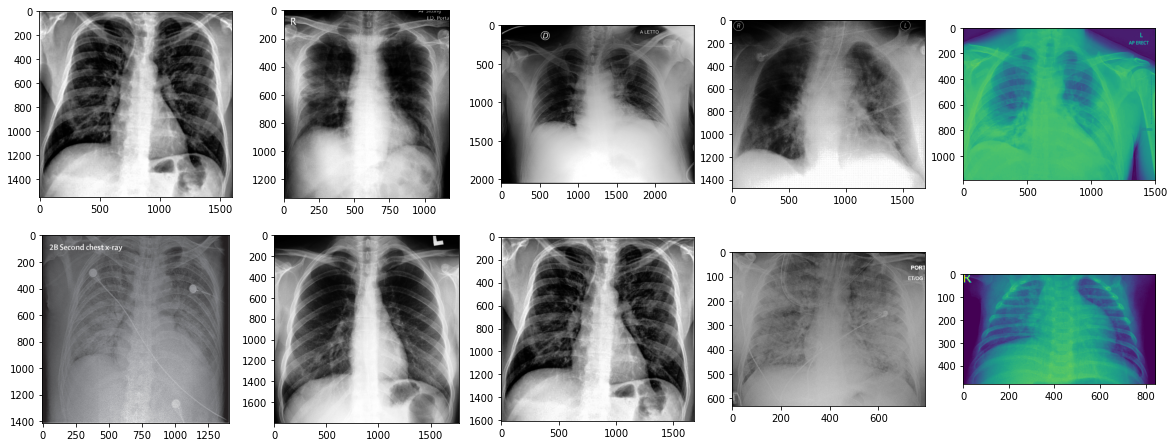

In [14]:
covid=[]
img_path=path1+"\\train\\Covid"
for filename in os.listdir(img_path):
    covid.append(os.path.join(img_path, filename))

fig = plt.figure(figsize = (20,20))
for i in range(10):
    idx = np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image=plt.imread(covid[idx])
    plt.imshow(image)

## Normal X-rays

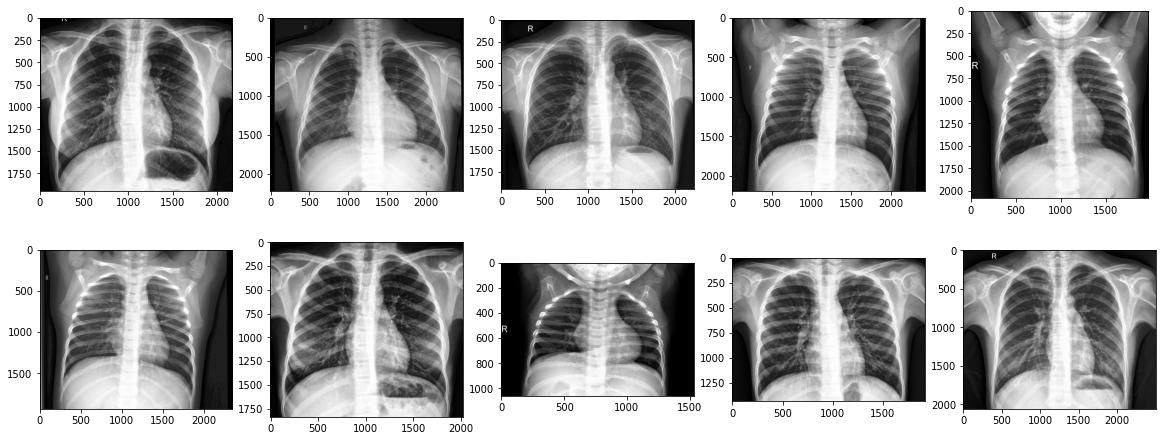

In [15]:
normal=[]
img_path=path1+"\\train\\Normal"
for filename in os.listdir(img_path):
    normal.append(os.path.join(img_path, filename))

fig = plt.figure(figsize = (20,20))
for i in range(10):
    idx = np.random.randint(0,50)
    plt.subplot(5,5,i+1)
    image=plt.imread(normal[idx])
    plt.imshow(image)

## Viral Pneumonia X-rays

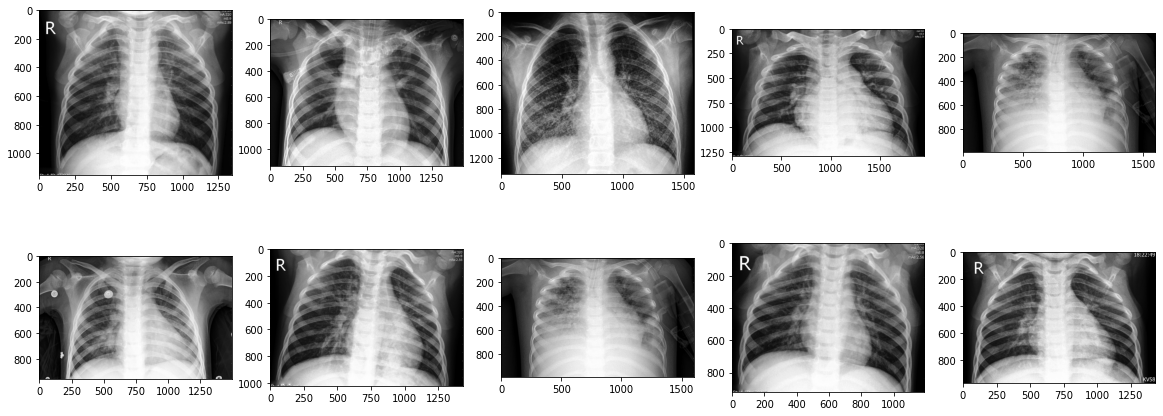

In [16]:
Viral_Pneumonia=[]
img_path=path1+"\\train\\Viral Pneumonia"
for filename in os.listdir(img_path):
    Viral_Pneumonia.append(os.path.join(img_path,filename))
    
fig =plt.figure(figsize=(20,20))
for i in range(10):
    idx =np.random.randint(0,50)
    plt.subplot(5,5,i+1)
    image =plt.imread(Viral_Pneumonia[idx])
    plt.imshow(image)

In [17]:
for dirname,_ ,filesnames in os.walk(path1):
    for filename in filesnames:
        print(os.path.join(dirname,filename))

E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0100.jpeg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0102.jpeg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0105.png
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0106.jpeg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0108.jpeg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0111.jpg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0112.jpg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0113.jpg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0115.jpeg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0118.jpeg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0119.jpeg
E:\DataScience\Data_Center\Covid_19_img_data\Covid19-dataset\test\Covid\0120.jpg
E:\DataScience\Data_C

In [18]:
#image agumentation for training set

training_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=10,
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest")

#image agumentation for testing set
testing_gen =ImageDataGenerator(rescale=1./255)

#image agumentation for validation set
val_gen =ImageDataGenerator(rescale=1./255,
                            rotation_range=10,
                            width_shift_range=.1,
                            height_shift_range=.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode="nearest")
                            

In [19]:
train

'E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\train'

In [37]:
##
train_data =training_gen.flow_from_directory(train,target_size=(224,224),
                                             batch_size=16,
                                             classes=['Covid','Normal','Viral Pneumonia'],
                                             class_mode='categorical')


valid_data =val_gen.flow_from_directory(test,target_size=(224,224),
                                        batch_size=16,
                                        classes=['Covid','Normal','Viral Pneumonia'],
                                        class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [21]:
#Model 

model_cnn = Sequential([
    #1st conv2d layer  ---3 channnel RGB
    Conv2D(64,(3,3),activation='relu',strides=2,input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    
    #2nd conv2d layer
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    #3rd conv2d layer
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    #4th conv2d layer
    Conv2D(512,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    
    #5th coved layers
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.09),
    
    Flatten(),
    Dropout(0.1),
    
    #1st dense layer
    Dense(128,activation='relu'),
    
    #2nd dense layer 
    Dense(256,activation ='relu'),
    Dropout(0.1),
    
    #3rd dense layer
    Dense(512,activation ='relu'),
    Dropout(0.4),
    
    #output layer
    Dense(3,activation ='softmax'),
])

model_cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 111, 111, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 512)       1

In [23]:
model_cnn.layers

In [24]:
#early_Stopping
from tensorflow.keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(
             monitor='val_accuracy', 
             patience=15, 
             min_delta=0.001, 
             mode='max')


In [40]:
#traning images with own model created
with tf.device('/GPU:0'):
    history =model_cnn.fit_generator(train_data,validation_data=valid_data,
                                 epochs=30,
                                 steps_per_epoch =len(train_data),
                                 validation_steps=len(valid_data),
                            
)

Epoch 1/30
8/8 [==============================] - 7s 819ms/step - loss: 0.3165 - accuracy: 0.8964 - val_loss: 0.3936 - val_accuracy: 0.8030
Epoch 2/30
8/8 [==============================] - 6s 769ms/step - loss: 0.2523 - accuracy: 0.8924 - val_loss: 0.4260 - val_accuracy: 0.8182
Epoch 3/30
8/8 [==============================] - 6s 754ms/step - loss: 0.2196 - accuracy: 0.9163 - val_loss: 0.2076 - val_accuracy: 0.9091
Epoch 4/30
8/8 [==============================] - 6s 764ms/step - loss: 0.2147 - accuracy: 0.9363 - val_loss: 0.2693 - val_accuracy: 0.8636
Epoch 5/30
8/8 [==============================] - 6s 755ms/step - loss: 0.2526 - accuracy: 0.9084 - val_loss: 0.2933 - val_accuracy: 0.8485
Epoch 6/30
8/8 [==============================] - 6s 760ms/step - loss: 0.1759 - accuracy: 0.9363 - val_loss: 0.1889 - val_accuracy: 0.9091
Epoch 7/30
8/8 [==============================] - 6s 805ms/step - loss: 0.1881 - accuracy: 0.9203 - val_loss: 0.3006 - val_accuracy: 0.8788
Epoch 8/30
8/8 [====

In [41]:
#save this model so that we can do testing by using this model..
#save it as h5 file
from tensorflow.keras.models import load_model
model_cnn.save('Model_CNN.h5')

# Testing model_CNN

In [44]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
img =image.load_img('E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Covid\\COVID-00037.jpg',target_size=(224,224))
#X=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
#img_data=preprocess_input(X)
result=model_cnn.predict(img)

if result[0][0] == 1:
    print("Covid-afftected")
elif result[0][1] == 1:
    print("Normal")
elif result[0][2] ==1:
    print("Viral-Phnemonia")

Covid-afftected


Text(0.5, 1.0, 'Actual : Covid Affected \nPredicted  : Covid-afftected')

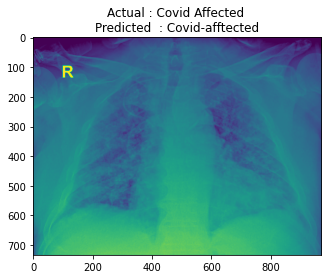

In [45]:
Image='E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Covid\\COVID-00037.jpg'
image=plt.imread(Image)
plt.imshow(image)
plt.title("Actual : Covid Affected \n" +"Predicted  : Covid-afftected")

In [92]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
img =image.load_img('E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\train\\Covid\\COVID-00010.jpg',target_size=(224,224))
#X=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
#img_data=preprocess_input(X)
result=model_cnn.predict(img)

if result[0][0] == 1:
    print("Covid-afftected")
elif result[0][1] == 1:
    print("Normal")
elif result[0][2] ==1:
    print("Viral-Phnemonia")

Covid-afftected


Text(0.5, 1.0, 'Actual : Viral Pneumonia \nPredicted  : Viral Pneumonia')

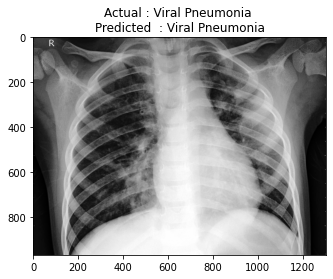

In [49]:
Image='E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Viral Pneumonia\\0101.jpeg'
image=plt.imread(Image)
plt.imshow(image)
plt.title("Actual : Viral Pneumonia \n" +"Predicted  : Viral Pneumonia")

In [51]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import load_img
img =image.load_img('E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Normal\\0105.jpeg',target_size=(224,224))
#X=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
#img_data=preprocess_input(X)
result=model_cnn.predict(img)

if result[0][0] == 1:
    print("Covid-afftected")
elif result[0][1] == 1:
    print("Normal")
elif result[0][2] ==1:
    print("Viral-Phnemonia")

Viral-Phnemonia


Text(0.5, 1.0, 'Actual : Normal \nPredicted  : Viral-Phnemonia')

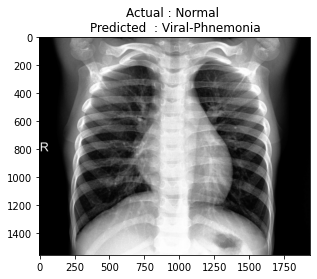

In [52]:
Image='E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Normal\\0119.jpeg'
image=plt.imread(Image)
plt.imshow(image)
plt.title("Actual : Normal \n" +"Predicted  : Viral-Phnemonia")

# Implementing Via Transfer-Leraning

In [53]:
#reset the image size
Image_size=[224,224]

In [54]:
#importing the VGG19 and also removing top_layers and we will use pre-trained weight(imagnet weight)
mobilenet =VGG19(include_top=False,input_shape=Image_size +[3],weights='imagenet')

In [55]:
#need_not to train the weight a we are using pre trained weight
for layer in mobilenet.layers:
  layer.trainable =False

In [56]:
#fetehcing the folder
fold =glob("E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\train\\*")
fold

['E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\train\\Covid',
 'E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\train\\Normal',
 'E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\train\\Viral Pneumonia']

In [57]:
#adding output layer
X =Flatten()(mobilenet.output)
out_layers =Dense(len(fold),activation='softmax')(X)

In [58]:
#creating instance of model
model =Model(inputs=mobilenet.input,outputs=out_layers)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [59]:
#model_compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:
#traning images with own model created
with tf.device('/GPU:0'):
    history =model.fit_generator(train_data,validation_data=valid_data,
                                 epochs=30,
                                 steps_per_epoch =len(train_data),
                                 validation_steps=len(valid_data)
)

Epoch 1/30
8/8 [==============================] - 7s 886ms/step - loss: 0.0266 - accuracy: 0.9960 - val_loss: 0.0643 - val_accuracy: 0.9848
Epoch 2/30
8/8 [==============================] - 7s 855ms/step - loss: 0.0314 - accuracy: 0.9960 - val_loss: 0.1150 - val_accuracy: 0.9545
Epoch 3/30
8/8 [==============================] - 7s 838ms/step - loss: 0.0414 - accuracy: 0.9960 - val_loss: 0.0662 - val_accuracy: 0.9848
Epoch 4/30
8/8 [==============================] - 7s 855ms/step - loss: 0.0385 - accuracy: 0.9920 - val_loss: 0.1792 - val_accuracy: 0.9242
Epoch 5/30
8/8 [==============================] - 7s 825ms/step - loss: 0.0443 - accuracy: 0.9880 - val_loss: 0.1035 - val_accuracy: 0.9545
Epoch 6/30
8/8 [==============================] - 7s 826ms/step - loss: 0.0290 - accuracy: 0.9920 - val_loss: 0.0758 - val_accuracy: 0.9697
Epoch 7/30
8/8 [==============================] - 7s 828ms/step - loss: 0.0338 - accuracy: 0.9920 - val_loss: 0.0770 - val_accuracy: 1.0000
Epoch 8/30
8/8 [====

In [81]:
#save this model so that we can do testing by using this model..
#save it as h5 file
from tensorflow.keras.models import load_model
model.save('Model_VGG19.h5')

In [82]:
y_pred = model.predict(valid_data)
y_pred

array([[9.99400258e-01, 3.87798391e-05, 5.60938963e-04],
       [9.99659181e-01, 1.86693404e-04, 1.54059162e-04],
       [8.76880506e-07, 9.83699203e-01, 1.62999481e-02],
       [3.75664968e-06, 9.98262465e-01, 1.73378712e-03],
       [9.95410144e-01, 7.56405876e-04, 3.83347040e-03],
       [1.27342828e-02, 2.48552598e-02, 9.62410450e-01],
       [2.38168825e-04, 7.61242700e-05, 9.99685764e-01],
       [9.99987721e-01, 3.17215517e-06, 9.10337076e-06],
       [9.93571758e-01, 3.22823849e-04, 6.10541506e-03],
       [9.99970794e-01, 6.14049213e-07, 2.85567312e-05],
       [9.97908950e-01, 5.85513830e-04, 1.50559645e-03],
       [1.07721289e-05, 9.45422709e-01, 5.45665286e-02],
       [1.24476792e-04, 2.11904198e-03, 9.97756541e-01],
       [1.39192762e-05, 9.96431828e-01, 3.55419843e-03],
       [9.99381304e-01, 6.58517706e-07, 6.18009595e-04],
       [9.99604285e-01, 6.40851522e-06, 3.89308028e-04],
       [4.61599211e-06, 9.99987006e-01, 8.38378946e-06],
       [6.78016576e-08, 7.92721

In [83]:
y_pred[[0]]

array([[9.9940026e-01, 3.8779839e-05, 5.6093896e-04]], dtype=float32)

In [84]:
a =np.argmax(y_pred[[0]],axis=1)
a

array([0], dtype=int64)

In [85]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# Testing Model

In [95]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
img =image.load_img('E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\train\\Covid\\COVID-00010.jpg',target_size=(224,224))
#X=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
#img_data=preprocess_input(X)
result=model.predict(img)

if result[0][0] == 1:
    print("Covid-afftected")
elif result[0][1] == 1:
    print("Normal")
elif result[0][2] ==1:
    print("Viral-Phnemonia")

Covid-afftected


Text(0.5, 1.0, 'Actual : Covid Affected \nPredicted  : Covid Affected')

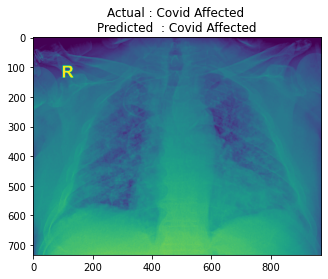

In [96]:
Image='E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Covid\\COVID-00037.jpg'
image=plt.imread(Image)
plt.imshow(image)
plt.title("Actual : Covid Affected \n" +"Predicted  : Covid Affected")

In [71]:
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import load_img
img =image.load_img('E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Normal\\0119.jpeg',target_size=(224,224))
#X=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
#img_data=preprocess_input(X)
result=model.predict(img)

if result[0][0] == 1:
    print("Covid-afftected")
elif result[0][1] == 1:
    print("Normal")
elif result[0][2] ==1:
    print("Viral-Phnemonia")

Normal


Text(0.5, 1.0, 'Actual : Normal \nPredicted  : Normal')

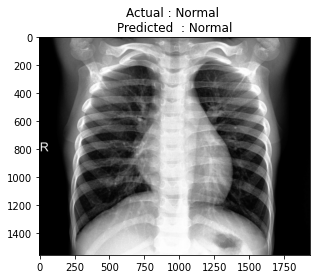

In [72]:
Image='E:\\DataScience\\Data_Center\\Covid_19_img_data\\Covid19-dataset\\test\\Normal\\0119.jpeg'
image=plt.imread(Image)
plt.imshow(image)
plt.title("Actual : Normal \n" +"Predicted  : Normal")